# Reference: [Topic Modelling](https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0)

In [1]:
import pandas as pd
import os

In [2]:
df = pd.DataFrame()

for file in os.listdir("./hwz data/sentiment"):
    if file.endswith(".xlsx"):
        path = os.path.join("./hwz data/sentiment", file)
        temp_df = pd.read_excel(path)
        df = pd.concat([df, temp_df], ignore_index=True)
        print('opening...', file)
        


opening... new sentiment 1 CLEANED.xlsx
opening... new sentiment 10 CLEANED.xlsx
opening... new sentiment 11 CLEANED.xlsx
opening... new sentiment 12 CLEANED.xlsx
opening... new sentiment 13 CLEANED.xlsx
opening... new sentiment 14 CLEANED.xlsx
opening... new sentiment 2 CLEANED.xlsx
opening... new sentiment 3 CLEANED.xlsx
opening... new sentiment 4 CLEANED.xlsx
opening... new sentiment 5 CLEANED.xlsx
opening... new sentiment 6 CLEANED.xlsx
opening... new sentiment 7 CLEANED.xlsx
opening... new sentiment 8 CLEANED.xlsx
opening... new sentiment 9 CLEANED.xlsx
opening... new sentiment Sep 2018 cleaned.xlsx


In [3]:
df.tail()

,username,tborder,post_message,tborder1,Posts,Username Master Post,quote,Field1,Field2,clean_post_message,google_score,textblob_score,avg_score
1315,darthsid11111,"19-09-2018, 06:32 PM",The new sifu as Mr Chan referred to him is ext...,6470,NaN,iwillendyou wrote:,Anyone been to Meng Yee recently? The usual un...,iwillendyou wrote:\n\t\n\t\n\t\n\t\tAnyone bee...,iwillendyou wrote:\n\t\n\t\n\t\n\t\tAnyone bee...,new sifu mr chan refer extremely eager willing...,0.2,0.082447,0.141224
1316,freewilly5000,"19-09-2018, 06:58 PM",SB definitely more affordable option. I think ...,6471,"1,065",NaN,NaN,NaN,SB definitely more affordable option. I think ...,sb definitely affordable option . think serve ...,0.9,0.000000,0.450000
1317,Kiton12345,"20-09-2018, 12:05 AM",Haven't been tailoring for a couple of years. ...,6472,NaN,NaN,NaN,NaN,Haven't been tailoring for a couple of years. ...,tailor couple year . look clear old stash clot...,0.0,0.025000,0.012500
1318,chickenbackside,"20-09-2018, 08:43 AM","Unfortunately, Mr Chan, the original owner, ha...",6473,NaN,iwillendyou wrote:,Anyone been to Meng Yee recently? The usual un...,iwillendyou wrote:\n\t\n\t\n\t\n\t\tAnyone bee...,iwillendyou wrote:\n\t\n\t\n\t\n\t\tAnyone bee...,"unfortunately , mr chan , original owner , par...",0.0,0.018750,0.009375
1319,arcfire,"20-09-2018, 09:20 AM","I'd still go to them.\n\t\nOh, that is sad news.",6474,"2,683",chickenbackside wrote:,"Unfortunately, Mr Chan, the original owner, ha...",chickenbackside wrote:\n\t\n\t\n\t\n\t\tUnfort...,chickenbackside wrote:\n\t\n\t\n\t\n\t\tUnfort...,"would still go . oh , sad news .",-0.1,-0.500000,-0.300000


In [4]:
df.shape

(1320, 13)

In [5]:
count = 0
for file in os.listdir("./hwz data/sentiment"):
    if file.endswith(".xlsx"):
        path = os.path.join("./hwz data/sentiment", file)
        temp_df = pd.read_excel(path)
        print('opening', file)
        count += len(temp_df)
        
count

opening new sentiment 1 CLEANED.xlsx
opening new sentiment 10 CLEANED.xlsx
opening new sentiment 11 CLEANED.xlsx
opening new sentiment 12 CLEANED.xlsx
opening new sentiment 13 CLEANED.xlsx
opening new sentiment 14 CLEANED.xlsx
opening new sentiment 2 CLEANED.xlsx
opening new sentiment 3 CLEANED.xlsx
opening new sentiment 4 CLEANED.xlsx
opening new sentiment 5 CLEANED.xlsx
opening new sentiment 6 CLEANED.xlsx
opening new sentiment 7 CLEANED.xlsx
opening new sentiment 8 CLEANED.xlsx
opening new sentiment 9 CLEANED.xlsx
opening new sentiment Sep 2018 cleaned.xlsx


1320

In [6]:
df.nunique()

username                 255
tborder                 1288
post_message            1318
tborder1                1304
Posts                    191
Username Master Post     234
quote                    747
Field1                   787
Field2                  1263
clean_post_message      1314
google_score              19
textblob_score           568
avg_score                808
dtype: int64

In [7]:
temp = []
for file in os.listdir("./hwz data/sentiment"):
    if file.endswith(".xlsx"):
        path = os.path.join("./hwz data/sentiment", file)
        temp_df = pd.read_excel(path)
        temp.append([temp_df['tborder1'][0], temp_df['tborder1'][len(temp_df)-1], file])

        
temp.sort()
temp


[[6388, 6474, 'new sentiment Sep 2018 cleaned.xlsx'],
 [6475, 6574, 'new sentiment 10 CLEANED.xlsx'],
 [6576, 6675, 'new sentiment 13 CLEANED.xlsx'],
 [6676, 6775, 'new sentiment 14 CLEANED.xlsx'],
 [6777, 6826, 'new sentiment 5 CLEANED.xlsx'],
 [6827, 6925, 'new sentiment 1 CLEANED.xlsx'],
 [6931, 7030, 'new sentiment 4 CLEANED.xlsx'],
 [7031, 7080, 'new sentiment 8 CLEANED.xlsx'],
 [7081, 7180, 'new sentiment 7 CLEANED.xlsx'],
 [7181, 7280, 'new sentiment 9 CLEANED.xlsx'],
 [7282, 7381, 'new sentiment 11 CLEANED.xlsx'],
 [7383, 7425, 'new sentiment 12 CLEANED.xlsx'],
 [7426, 7524, 'new sentiment 6 CLEANED.xlsx'],
 [7531, 7630, 'new sentiment 3 CLEANED.xlsx'],
 [7636, 7735, 'new sentiment 2 CLEANED.xlsx']]

In [8]:
df['clean_post_message'] = df['clean_post_message'].astype('str')
len(df['clean_post_message'])

1320

In [ ]:
# df['clean_text'] = df['comment'].apply(preprocess)

In [ ]:
# df.head(10)

# LDA gensim

In [9]:
from gensim.models import Phrases
from nltk.tokenize import word_tokenize

In [94]:
remove = ['use', 'from', 'gagt', 'using',
          'quite', 'also', 'go', 'know',
          'well', 'get', 'think', 'try',
          'work', 'sure', 'even', 'look',
          'would', 'samsung', 'send', 'make',
          'see', 'tailor', 'one', 'really',
          'say', 'need', 'time', 'like', 'good', 'check',
#           'fabric', 'shirt', 'suit', 'jacket', 'pant', 'trouser',
          'fit', 'thing', 'want', 'anyone', 'start', 'maybe', 'thanks', 'seem',
          'much', 'ask', 'where', 'change', 'take', 'still', 'find',
          'little', 'help', 'tell', 'around', 'recommendation', 'etc', 'k', 'u', 'could', 'give', 'thank',
          'hi', 'ok', 'haha', 'actually', 'wear'
             
         ]

In [95]:
tokens = []

for post in df['clean_post_message']:
    x = word_tokenize(post)
    # print(x)
    x = [w for w in x if w.isalpha()]
    # print(x)
    x = [w for w in x if w not in remove]
    # print(x)
    tokens.append(x)


In [96]:
df['tokens'] = tokens
df.head()

,username,tborder,post_message,tborder1,Posts,Username Master Post,quote,Field1,Field2,clean_post_message,google_score,textblob_score,avg_score,tokens
0,TayYH89,"01-01-2019, 10:28 PM",First image was taken while in shop (others th...,6827,283,NaN,NaN,First image was taken while in shop (others th...,NaN,"first image take shop others morning , wear sh...",0.2,0.078819,0.139410,"[first, image, shop, others, morning, shirt, b..."
1,arcfire,"02-01-2019, 12:10 AM","Jacket looks fine as it is for otr, especially...",6828,"2,683",TayYH89 wrote:,First image was taken while in shop (others th...,TayYH89 wrote:\n\t\n\t\n\t\n\t\tFirst image wa...,TayYH89 wrote:\n\t\n\t\n\t\n\t\tFirst image wa...,"jacket look fine otr , especially price . pant...",0.0,0.305556,0.152778,"[jacket, fine, otr, especially, price, pant, t..."
2,cokiee,"02-01-2019, 12:28 AM",Looks like a good fit for the jacket - congrat...,6829,"1,236",NaN,NaN,Looks like a good fit for the jacket - congrat...,NaN,look like good fit jacket congratulation !,0.7,0.600000,0.650000,"[jacket, congratulation]"
3,darthsid11111,"02-01-2019, 07:04 AM",Congrats! It looks good for what you paid for ...,6830,NaN,NaN,NaN,Congrats! It looks good for what you paid for ...,NaN,congrats ! look good paid .,0.3,0.700000,0.500000,"[congrats, paid]"
4,theblueark,"02-01-2019, 07:59 AM",Great fit on the jacket for that price. Pants ...,6831,NaN,TayYH89 wrote:,First image was taken while in shop (others th...,TayYH89 wrote:\n\t\n\t\n\t\n\t\tFirst image wa...,TayYH89 wrote:\n\t\n\t\n\t\n\t\tFirst image wa...,"great fit jacket price . pant ’ great yeah , t...",0.2,0.341905,0.270952,"[great, jacket, price, pant, great, yeah, move..."


In [97]:
len(tokens)

1320

In [98]:
#Prepare bi-grams and tri-grams
tokens = df['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

In [99]:
from gensim import corpora

In [100]:
#Prepare objects for LDA gensim implementation
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

In [101]:
#running LDA
from gensim import models
import numpy as np

In [123]:
np.random.seed(456)
num_topics = 6
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

Wall time: 2.47 s


In [124]:
#looking at topics
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print("Topic #"+str(i)+": ")
    print(topic)
    print()

Topic #0: 
0.027*"shirt" + 0.023*"fabric" + 0.013*"suit" + 0.012*"jacket" + 0.007*"budget" + 0.007*"price" + 0.007*"trouser" + 0.007*"pant" + 0.007*"cheap" + 0.006*"different" + 0.005*"issue" + 0.005*"way" + 0.005*"bespoke" + 0.005*"usually" + 0.005*"cost" + 0.005*"option" + 0.005*"first" + 0.005*"mtm" + 0.005*"people" + 0.005*"yes"

Topic #1: 
0.048*"suit" + 0.023*"pant" + 0.014*"price" + 0.013*"shirt" + 0.009*"recommend" + 0.009*"sze_sze" + 0.009*"jacket" + 0.008*"yeossal" + 0.007*"style" + 0.006*"budget" + 0.006*"option" + 0.006*"back" + 0.006*"though" + 0.005*"lai_en" + 0.005*"advice" + 0.005*"fabric" + 0.005*"guy" + 0.005*"seamless" + 0.005*"bad" + 0.005*"prefer"

Topic #2: 
0.029*"shirt" + 0.021*"suit" + 0.009*"pant" + 0.008*"new" + 0.008*"first" + 0.007*"trouser" + 0.007*"fabric" + 0.006*"quality" + 0.006*"experience" + 0.006*"guy" + 0.006*"recommend" + 0.005*"sze_sze" + 0.005*"alter" + 0.005*"long" + 0.005*"budget" + 0.005*"cut" + 0.005*"yeossal" + 0.005*"buy" + 0.005*"cuff" + 

In [125]:
#predicting topic for last post
lda_model[corpus[1319]]

[(3, 0.97572553)]

In [126]:
#allocation of topics in all posts
topics_list = [lda_model[corpus[i]] for i in range(len(df))]

In [127]:
#visualizing topics

# https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# -- Relevance of words is computed with a parameter lambda
# -- Lambda optimal value ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

C:\Users\suyee\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [107]:
import pickle
LDAvis_data_filepath = ''.join('./ldavis_prepared_'+str(num_topics))
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(vis, f)

In [108]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')

In [109]:
topic_df = pd.DataFrame(topics_list)
topic_df.to_excel('./ldavis_prepared_'+ str(num_topics) +'.xlsx', index=False)

In [130]:
topic_df.tail()

,0,1,2,3,4
1315,"(1, 0.9966798)",None,None,None,None
1316,"(4, 0.99338806)",None,None,None,None
1317,"(0, 0.99557966)",None,None,None,None
1318,"(4, 0.99750715)",None,None,None,None
1319,"(3, 0.98048514)",None,None,None,None


In [155]:
t0 = []
t1 = []
t2 = []
t3 = []
t4 = []

for col in topic_df:
    for row in topic_df[col]:
        if col == 0:
            try:
                t0.append(row[0])
            except:
                t0.append(row)
        elif col == 1:
            try:
                t1.append(row[0])
            except:
                t1.append(row)
        elif col == 2:
            try:
                t2.append(row[0])
            except:
                t2.append(row)
        elif col == 3:
            try:
                t3.append(row[0])
            except:
                t3.append(row)
        elif col == 4:
            try:
                t4.append(row[0])
            except:
                t4.append(row)
    

In [156]:
print(len(t0))
print(len(t1))
print(len(t2))
print(len(t3))
print(len(t4))

1320
1320
1320
1320
1320


In [162]:
update = {0:1, 1:5}

In [164]:
for i, v in enumerate(t0):
    print(i, v)
    if v in update:
        t0[i] = update[v]
    

0 2
1 0
2 0
3 3
4 3
5 1
6 0
7 3
8 1
9 4
10 0
11 1
12 2
13 0
14 4
15 3
16 3
17 2
18 3
19 3
20 2
21 4
22 1
23 4
24 0
25 4
26 0
27 0
28 0
29 4
30 0
31 3
32 0
33 2
34 1
35 0
36 1
37 4
38 0
39 2
40 0
41 0
42 1
43 1
44 1
45 3
46 3
47 0
48 1
49 4
50 3
51 4
52 2
53 0
54 3
55 2
56 4
57 0
58 4
59 2
60 1
61 2
62 0
63 4
64 3
65 4
66 0
67 3
68 0
69 3
70 0
71 3
72 0
73 3
74 0
75 4
76 0
77 4
78 2
79 0
80 0
81 2
82 0
83 4
84 1
85 3
86 3
87 2
88 4
89 3
90 0
91 3
92 4
93 1
94 3
95 1
96 3
97 4
98 3
99 4
100 0
101 2
102 0
103 0
104 0
105 0
106 3
107 3
108 2
109 2
110 1
111 2
112 2
113 0
114 0
115 3
116 2
117 2
118 1
119 0
120 0
121 1
122 3
123 2
124 2
125 4
126 1
127 1
128 2
129 0
130 3
131 3
132 0
133 1
134 3
135 2
136 0
137 0
138 2
139 0
140 0
141 0
142 3
143 0
144 2
145 1
146 0
147 3
148 1
149 0
150 0
151 1
152 1
153 4
154 3
155 3
156 2
157 1
158 1
159 0
160 3
161 2
162 0
163 3
164 2
165 0
166 1
167 3
168 0
169 2
170 1
171 2
172 2
173 1
174 0
175 3
176 0
177 3
178 0
179 1
180 1
181 1
182 0
183 0
184 0


In [166]:
for i, v in enumerate(t1):
    if v in update:
        t1[i] = update[v]

In [168]:
for i, v in enumerate(t2):
    if v in update:
        t2[i] = update[v]
        
for i, v in enumerate(t3):
    if v in update:
        t3[i] = update[v]
        
for i, v in enumerate(t4):
    if v in update:
        t4[i] = update[v]

In [170]:
new_topic_df = pd.DataFrame(t0)
new_topic_df.head()

,0
0,2
1,1
2,1
3,3
4,3


In [171]:
new_topic_df[1] = t1
new_topic_df.head()

,0,1
0,2,NaN
1,1,NaN
2,1,NaN
3,3,NaN
4,3,NaN


In [172]:
new_topic_df[2] = t2
new_topic_df[3] = t3
new_topic_df[4] = t4
new_topic_df.head()

,0,1,2,3,4
0,2,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN
4,3,NaN,NaN,NaN,NaN


In [174]:
len(new_topic_df)

1320

In [175]:
df.head()

,username,tborder,post_message,tborder1,Posts,Username Master Post,quote,Field1,Field2,clean_post_message,google_score,textblob_score,avg_score,tokens
0,TayYH89,"01-01-2019, 10:28 PM",First image was taken while in shop (others th...,6827,283,NaN,NaN,First image was taken while in shop (others th...,NaN,"first image take shop others morning , wear sh...",0.2,0.078819,0.139410,"[first, image, shop, others, morning, shirt, b..."
1,arcfire,"02-01-2019, 12:10 AM","Jacket looks fine as it is for otr, especially...",6828,"2,683",TayYH89 wrote:,First image was taken while in shop (others th...,TayYH89 wrote:\n\t\n\t\n\t\n\t\tFirst image wa...,TayYH89 wrote:\n\t\n\t\n\t\n\t\tFirst image wa...,"jacket look fine otr , especially price . pant...",0.0,0.305556,0.152778,"[jacket, fine, otr, especially, price, pant, t..."
2,cokiee,"02-01-2019, 12:28 AM",Looks like a good fit for the jacket - congrat...,6829,"1,236",NaN,NaN,Looks like a good fit for the jacket - congrat...,NaN,look like good fit jacket congratulation !,0.7,0.600000,0.650000,"[jacket, congratulation]"
3,darthsid11111,"02-01-2019, 07:04 AM",Congrats! It looks good for what you paid for ...,6830,NaN,NaN,NaN,Congrats! It looks good for what you paid for ...,NaN,congrats ! look good paid .,0.3,0.700000,0.500000,"[congrats, paid]"
4,theblueark,"02-01-2019, 07:59 AM",Great fit on the jacket for that price. Pants ...,6831,NaN,TayYH89 wrote:,First image was taken while in shop (others th...,TayYH89 wrote:\n\t\n\t\n\t\n\t\tFirst image wa...,TayYH89 wrote:\n\t\n\t\n\t\n\t\tFirst image wa...,"great fit jacket price . pant ’ great yeah , t...",0.2,0.341905,0.270952,"[great, jacket, price, pant, great, yeah, move..."


In [178]:
new_df = df.join(new_topic_df)

In [179]:
new_df.head()

,username,tborder,post_message,tborder1,Posts,Username Master Post,quote,Field1,Field2,clean_post_message,google_score,textblob_score,avg_score,tokens,0,1,2,3,4
0,TayYH89,"01-01-2019, 10:28 PM",First image was taken while in shop (others th...,6827,283,NaN,NaN,First image was taken while in shop (others th...,NaN,"first image take shop others morning , wear sh...",0.2,0.078819,0.139410,"[first, image, shop, others, morning, shirt, b...",2,NaN,NaN,NaN,NaN
1,arcfire,"02-01-2019, 12:10 AM","Jacket looks fine as it is for otr, especially...",6828,"2,683",TayYH89 wrote:,First image was taken while in shop (others th...,TayYH89 wrote:\n\t\n\t\n\t\n\t\tFirst image wa...,TayYH89 wrote:\n\t\n\t\n\t\n\t\tFirst image wa...,"jacket look fine otr , especially price . pant...",0.0,0.305556,0.152778,"[jacket, fine, otr, especially, price, pant, t...",1,NaN,NaN,NaN,NaN
2,cokiee,"02-01-2019, 12:28 AM",Looks like a good fit for the jacket - congrat...,6829,"1,236",NaN,NaN,Looks like a good fit for the jacket - congrat...,NaN,look like good fit jacket congratulation !,0.7,0.600000,0.650000,"[jacket, congratulation]",1,NaN,NaN,NaN,NaN
3,darthsid11111,"02-01-2019, 07:04 AM",Congrats! It looks good for what you paid for ...,6830,NaN,NaN,NaN,Congrats! It looks good for what you paid for ...,NaN,congrats ! look good paid .,0.3,0.700000,0.500000,"[congrats, paid]",3,NaN,NaN,NaN,NaN
4,theblueark,"02-01-2019, 07:59 AM",Great fit on the jacket for that price. Pants ...,6831,NaN,TayYH89 wrote:,First image was taken while in shop (others th...,TayYH89 wrote:\n\t\n\t\n\t\n\t\tFirst image wa...,TayYH89 wrote:\n\t\n\t\n\t\n\t\tFirst image wa...,"great fit jacket price . pant ’ great yeah , t...",0.2,0.341905,0.270952,"[great, jacket, price, pant, great, yeah, move...",3,NaN,NaN,NaN,NaN


In [180]:
len(new_df)

1320

In [181]:
new_df.to_excel('hwz_with_topics.xlsx', index=False)

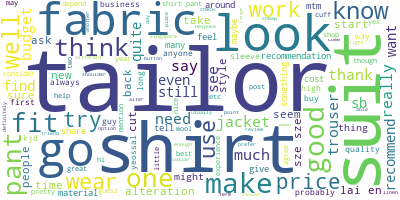

In [31]:
# # Import the wordcloud library
# from wordcloud import WordCloud

# # useless_list = ['hi', 'seamlessbespoke', 'll', 'congratulation', 'congrats']

# # Join the different processed titles together.
# long_string = ' '.join(list(df['clean_post_message'].values))

# # long_string_list = long_string.split()
# # long_string_list = [w for w in long_string_list if w not in useless_list]
# # long_string = ' '.join(long_string_list)

# # Create a WordCloud object
# wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# # Generate a word cloud
# wordcloud.generate(long_string)

# # Visualize the word cloud
# wordcloud.to_image()

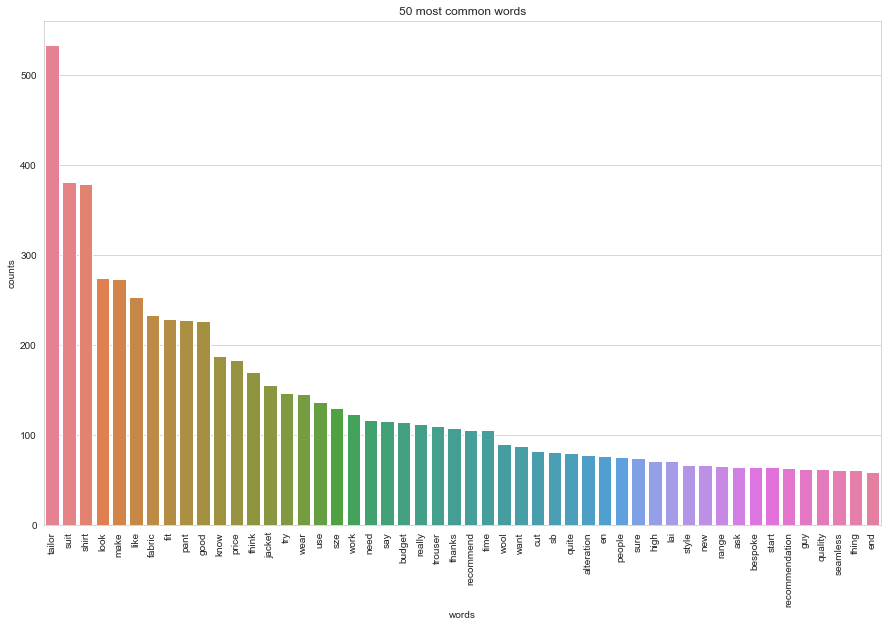

In [30]:
# # Load the library with the CountVectorizer method
# from sklearn.feature_extraction.text import CountVectorizer
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('whitegrid')
# %matplotlib inline 

# # Helper function
# def plot_10_most_common_words(count_data, count_vectorizer):
#     import matplotlib.pyplot as plt
#     words = count_vectorizer.get_feature_names()
#     total_counts = np.zeros(len(words))
#     for t in count_data:
#         total_counts+=t.toarray()[0]
    
#     count_dict = (zip(words, total_counts))
#     count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50]
#     words = [w[0] for w in count_dict]
#     counts = [w[1] for w in count_dict]
#     x_pos = np.arange(len(words)) 
    
#     plt.figure(2, figsize=(15, 15/1.6180))
#     plt.subplot(title='50 most common words')
#     sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
#     sns.barplot(x_pos, counts, palette='husl')
#     plt.xticks(x_pos, words, rotation=90) 
#     plt.xlabel('words')
#     plt.ylabel('counts')
#     plt.show()

# # Initialise the count vectorizer with the English stop words    
# count_vectorizer = CountVectorizer(stop_words='english')
# # Fit and transform the processed titles
# count_data = count_vectorizer.fit_transform(df['clean_post_message'])
# # Visualise the 10 most common words
# plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
# import warnings
# warnings.simplefilter("ignore", DeprecationWarning)

# # Load the LDA model from sk-learn
# from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# # Helper function
# def print_topics(model, count_vectorizer, n_top_words):
#     words = count_vectorizer.get_feature_names()
#     for topic_idx, topic in enumerate(model.components_):
#         print("\nTopic #%d:" % (topic_idx+1))
#         print(" ".join([words[i]
#                         for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# # Tweak the two parameters below
# number_topics = 4
# number_words = 10

# # Create and fit the LDA model
# lda = LDA(n_components=number_topics, n_jobs=-1)
# lda.fit(count_data)

# # Print the topics found by the LDA model
# print("Topics found via LDA:")
# print_topics(lda, count_vectorizer, number_words)

In [ ]:
# %%time
# from pyLDAvis import sklearn as sklearn_lda
# import pickle 
# import pyLDAvis

# LDAvis_data_filepath = ''.join('./ldavis_prepared_'+str(number_topics))
# # # this is a bit time consuming - make the if statement True
# # # if you want to execute visualization prep yourself

# if 1 == 1:
#     LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

In [ ]:
# with open(LDAvis_data_filepath, 'wb') as f:
#     pickle.dump(LDAvis_prepared, f)

In [ ]:
# # load the pre-prepared pyLDAvis data from disk
# with open(LDAvis_data_filepath, 'rb') as f:
#     LDAvis_prepared = pickle.load(f)
# pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')